In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def pi(s,theta,stdv):
    mu=s*theta[0]+theta[1]
    a= random.gauss(mu, stdv)
    return a

def gradlogpi(s,theta,stdv,a):
    b=np.array([ s*(a-(s*theta[0]+theta[1]))/(stdv*stdv) , (a-(s*theta[0]+theta[1]))/(stdv*stdv)])
    return b

In [3]:
gradlogpi(4,np.array([0,1]),1,2)

array([4., 1.])

In [4]:
pi(4,[0,1],1)

0.35890838341928943

In [5]:
class envi:
    def __init__(self):
        self.s=5*random.random()
        #self.mem=-10000
    def f(self, x):
        z=1/(3+(x-1)*(x-1))
        if(x>1.5):
            z=1/(1+(x-3)*(x-3))
        return z           
    def action(self, a):
        self.reward=self.f(max(min(a+self.s, 5), -5))-2          
        self.s=max(min(a+self.s, 5), -5)
            
 
    

In [6]:
c=envi()

In [7]:
c.s

2.7145231505293577

In [8]:
c.action(1)

In [9]:
print(c.s)
print(c.reward)

3.7145231505293577
-1.3379865519973557


In [10]:
class policylearning:
    def __init__(self, env, std):
        self.theta=np.array([-1*np.random.random(),2*np.random.random()-1])
        self.env=env
        self.std=std
        self.history=[]
    def explore(self, ittr , tmst):
        c=[]
        a_exp=[]
        s_exp=[]
        for it in range(ittr):
            self.env.s=5*random.random() ;
            R=0
            s_exp_it=[]
            a_exp_it=[]
            for tm in range(tmst):
                s_exp_it.append(self.env.s)
                a=pi(self.env.s,self.theta,self.std)
                a_exp_it.append(a);
                self.env.action(a);
                R=R+self.env.reward
            c.append(R);
            a_exp.append(a_exp_it) 
            s_exp.append(s_exp_it)            
        return  c , a_exp   , s_exp             
    def Learn(self,n_ex, tmst , ittr ,  w , descend_rate):
        for itt in range(ittr):
            c , a_exp , s_exp =self.explore(n_ex, tmst)
            theta0=self.theta
            for ex in range(n_ex):
                for t in range(tmst):
                    self.theta=np.clip(self.theta+w*gradlogpi(s_exp[ex][t], theta0 , self.std , a_exp[ex][t])*c[ex]/n_ex , [-1,-1] , [0,1])
            self.history.append(sum(c)/len(c))
            w=w*descend_rate
    def History(self):
        plt.plot(self.history)
        
            
 
    
    
    
    


In [11]:
model=policylearning(c, 0.1)

In [12]:
model.explore(ittr= 50 ,tmst= 30)

([-34.73436043721618,
  -38.24324417115354,
  -41.26702226900562,
  -38.61350895005618,
  -37.759746436985836,
  -38.665109082958814,
  -35.75964022303805,
  -36.655841355881044,
  -38.6779319159071,
  -39.148275881358195,
  -35.832850806735394,
  -38.063777323954454,
  -35.87774692418213,
  -40.09038911736837,
  -35.40251743099379,
  -36.36328309197283,
  -36.746950754135014,
  -42.759576523248036,
  -37.076772846634896,
  -39.607605434696104,
  -36.609059518383795,
  -35.71256377502862,
  -40.76055483351028,
  -35.47863450936349,
  -36.782787328016774,
  -41.49048970609013,
  -36.48396954064762,
  -38.10359586255301,
  -36.41938439391194,
  -35.30753694842988,
  -35.631820765530485,
  -38.15102247032849,
  -39.89000403335566,
  -43.20391992092684,
  -35.68385174524591,
  -35.59822511385081,
  -37.19938643006132,
  -38.11366307603584,
  -35.49477032327944,
  -37.70805880159928,
  -36.99611574135597,
  -38.797349696246506,
  -38.31012014868699,
  -41.03996498356401,
  -36.2965339453068

In [13]:
model.Learn(n_ex=100,tmst= 50 ,ittr=3000 ,w=  0.00005, descend_rate=0.997)

In [14]:
model.theta

array([-0.33473608,  0.99497203])

In [15]:
c.s

2.845779875685883

In [16]:
c.reward

-1.023231316668177

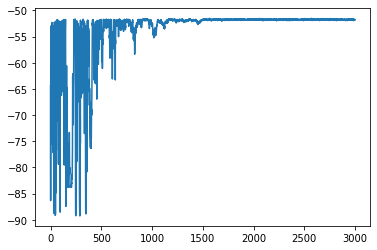

In [17]:
model.History()

In [18]:
model.explore(ittr= 5 ,tmst= 30)

([-31.529080712210742,
  -32.527577968666506,
  -31.233113438431708,
  -30.935746897140646,
  -31.156875814989576],
 [[0.44457161110823845,
   0.3947381156186636,
   0.15103345234287832,
   0.29410848378816185,
   0.2102452216530729,
   0.09650456613222089,
   0.011591478015804783,
   -0.04404183821855162,
   -0.028363049943980027,
   0.058864160867665216,
   -0.14201932131191153,
   -0.17914936658074854,
   0.03695076147512981,
   0.13143750688104394,
   0.04509613414742601,
   0.060628404455474995,
   -0.01633807559222405,
   0.09178788517985852,
   -0.026851348618901746,
   0.0435604371174719,
   -0.11793582789231453,
   -0.06739984496337671,
   -0.010184721825356596,
   -0.03577401835657593,
   -0.08942124968095541,
   0.058971934656037964,
   -0.0016167201839600992,
   0.03710001342886768,
   0.048130859016459734,
   0.010867627128523422],
  [0.7611033896289932,
   0.748861712774605,
   0.33230984765572597,
   0.3062163659468677,
   0.1329870609621175,
   0.030337699622379255,
   

In [19]:
0.997**1000

0.04956308282315543

In [22]:
s = np.linspace(-5, 5, 200)
mu=s*model.theta[0]+model.theta[1]

Text(0, 0.5, 'mu(s,theta)')

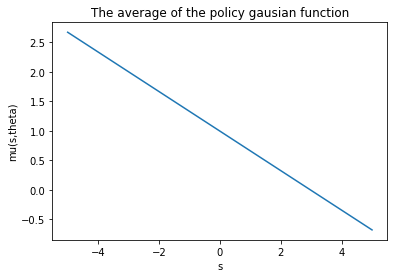

In [24]:
plt.plot(s,mu)
plt.title("The average of the policy gausian function")
plt.xlabel("s")
plt.ylabel("mu(s,theta)")